<a href="https://colab.research.google.com/github/SanyamWadhwa07/ML/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)


In [4]:
X.shape

(1000, 2)

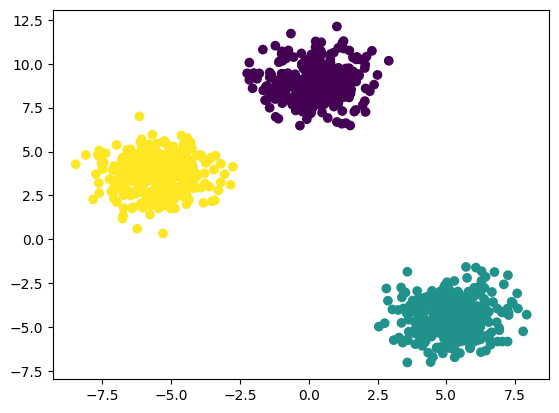

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [7]:
X_train.shape
y_train.shape
y_test.shape
X_test.shape


(500, 2)

from sklearn.cluster import KMeans

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [11]:
wcss

[25887.665265226482,
 5906.709667290279,
 962.2780187929342,
 831.7195364199673,
 720.3471340117611,
 615.2721595595825,
 535.2495856075843,
 484.22156667725835,
 415.4381584687252,
 381.6582954292158]

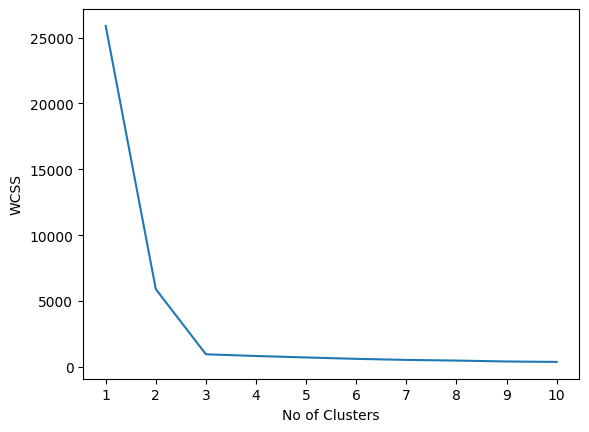

In [13]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [17]:
y_labels=kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


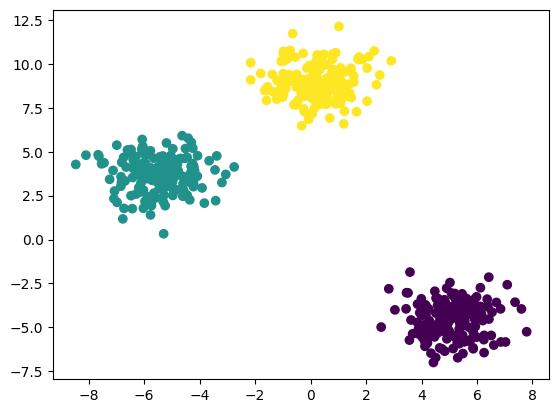

In [18]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [19]:
y_test_labels=kmeans.predict(X_test)

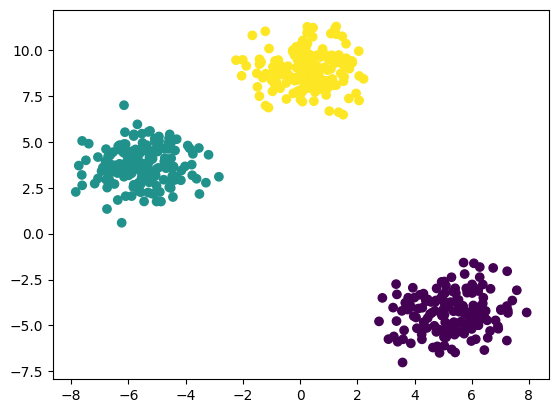

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [23]:
#knee location
!pip install kneed



In [24]:
from kneed import KneeLocator

In [27]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction='decreasing')
knee.elbow

3

In [29]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [30]:
silhouette_coefficients

[0.7288318110797759,
 0.8080704383340162,
 0.6419371588270345,
 0.4970063017177374,
 0.34888275677599223,
 0.34912260786842847,
 0.35686529866328226,
 0.34209004275218047,
 0.3459741927137219]

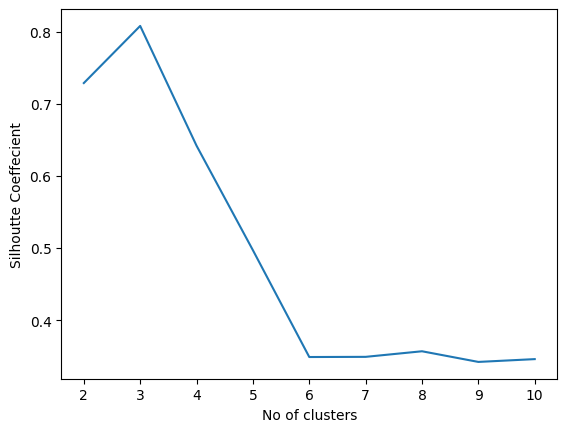

In [34]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()